## Exercise 4
## Introduction to Latent Representation and Tensors

## Exercise-4.1 
# Latent representation using SVD
Students and Course: Recommendation using matrix factorization. 

$$
Data = \left( \begin{array}{ccccccccccc}
                       & IIS & Semantic-Web & KGA & MachineLearning & NeuralNetworks & Algorithms & Ubiquitous Computing & Cryptography & CognitiveRobotics & CombinatorialOptimization  \\ 
                Livin & \_  & \_ & 1 & 1 & 1 & \_ & \_ & \_ & \_ & \_\\
                Julian & 1  & \_ &  1 & 1 & \_ & 1 & \_ & \_ & 1 & \_\\  
                Andy & \_ &  \_ &  \_ & \_ & \_ & \_ & 1 & 1  & \_ & 1\\ 
                Nofel & 1  & 1 & 1 & \_ & 1 & \_ & \_ & \_ & \_ & \_\\
                Amrit & 1  & 1 & 1 & 1 & 1 & \_ & \_ & \_ & \_  & \_\\                
                Manzil & \_ & \_ & 1 & 1 & 1 & \_ & \_ & \_ & 1 & \_ \\
                Pooja & 1  & 1  & 1 & 1 & \_ & \_ & \_ & \_ & \_ & \_ \\
                Lukas & \_  & \_ & \_ & 1 & \_ & 1 & \_ & 1 & 1 & 1\\  
                \end{array} 
\right)
$$


In [1]:
import numpy as np
from scipy.linalg import svd,diagsvd
import matplotlib.pyplot as plt
#generate the data 
X = np.array([[0,0,1,1,1,0,0,0,0,0],
             [1,0,1,1,0,1,0,0,1,0],
             [0,0,0,0,0,0,1,1,0,1],
             [1,1,1,0,1,0,0,0,0,0],
             [1,1,1,1,1,0,0,0,0,0],
             [0,0,1,1,1,0,0,0,1,0],
             [1,1,1,1,0,0,0,0,0,0],
             [0,0,0,1,0,1,0,1,1,1]])

(8, 8)
(10, 10)
(8,)


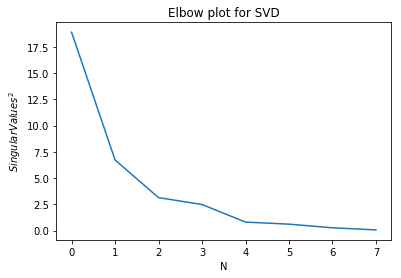

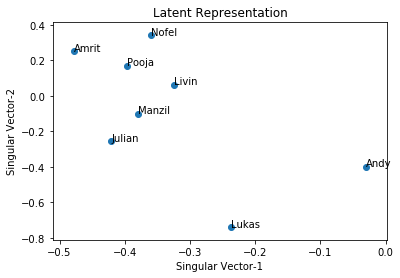

X=
.[[0 0 1 1 1 0 0 0 0 0]
 [1 0 1 1 0 1 0 0 1 0]
 [0 0 0 0 0 0 1 1 0 1]
 [1 1 1 0 1 0 0 0 0 0]
 [1 1 1 1 1 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 1 0]
 [1 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 1 1 1]]
U=
.[[-0.3  0.1  0.2 -0.5  0.3 -0.1  0.6  0.3]]
V=
.[[-0.4]
 [ 0.2]
 [-0.2]
 [ 0.5]
 [-0.2]
 [-0.1]
 [ 0.1]
 [-0.4]
 [ 0.5]
 [ 0.1]]
Score=
.[[ 0.04617607  0.13424659  0.90155657  0.80904016  1.08909287 -0.10131373
   0.00178218 -0.01146103  0.33989904 -0.01146103]
 [ 0.85755057  0.24667006  0.833104    1.18902275 -0.02676863  0.91670222
  -0.25609555  0.04972616  0.98032617  0.04972616]
 [-0.07490512  0.18119043 -0.163318    0.04154119  0.10063693  0.06511688
   0.73284046  1.05405289 -0.02507818  1.05405289]
 [ 0.92169354  0.97179058  0.97125888  0.45296099  0.74685223 -0.20282477
   0.11635324 -0.0363745  -0.23253264 -0.0363745 ]
 [ 0.98194855  0.93417357  1.22986704  0.83167816  0.91856706 -0.01869716
   0.07269657  0.00622443  0.07478216  0.00622443]
 [-0.01053514 -0.07415909  0.97446354  1.1163

In [2]:
#SVD Calculatiom
U, s, Vh = svd(X)
print(np.shape(U))
print(np.shape(Vh))
print(np.shape(s))
#Elbow PLot: To decide significant singular values
plt.plot(s**2)
plt.xlabel('N')
plt.ylabel('$Singular Values^2$')
plt.title('Elbow plot for SVD')
plt.show()
plt.scatter(U[:,0],U[:,1])
for i,name in enumerate(['Livin','Julian','Andy','Nofel','Amrit','Manzil','Pooja','Lukas']):
    plt.annotate(name,(U[i,0],U[i,1]))
plt.xlabel('Singular Vector-1')
plt.ylabel('Singular Vector-2')
plt.title('Latent Representation')
plt.show()
#truncate to only first few singular values
s[4:]=0
#calculate estimate using truncated S
out_score = np.dot(np.dot(U,diagsvd(s,8,10)),Vh)
#show results
print("X=\n.{}".format(X))
print("U=\n.{}".format((U[:1,:].round(1))))
print("V=\n.{}".format(Vh[:,:1].round(1)))
print("Score=\n.{}".format(out_score))
print("Reconstructed-X=\n.{}".format(np.round(out_score)))

## Exercise-4.2

## Introduction To Tensor

In [3]:
data = np.arange(36).reshape((3,4,3))
print('Data= \n{}'.format(data))

Data= 
[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]
  [ 9 10 11]]

 [[12 13 14]
  [15 16 17]
  [18 19 20]
  [21 22 23]]

 [[24 25 26]
  [27 28 29]
  [30 31 32]
  [33 34 35]]]


In [4]:
# To view frontal slide
print(data[:,:,0])

[[ 0  3  6  9]
 [12 15 18 21]
 [24 27 30 33]]


In [5]:
def unfold(X, mode):
    return np.reshape(np.moveaxis(X,mode,0),(X.shape[mode],-1))

def fold(X, mode, shape):
    new_shape = list(shape)
    mode_dim = new_shape.pop(mode)
    new_shape.insert(0, mode_dim)
    return np.moveaxis(np.reshape(X, new_shape), 0, mode)


## Unfolding Tensors

In [6]:
unfold(data,mode=0)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]])

In [7]:
unfold(data,mode=1)

array([[ 0,  1,  2, 12, 13, 14, 24, 25, 26],
       [ 3,  4,  5, 15, 16, 17, 27, 28, 29],
       [ 6,  7,  8, 18, 19, 20, 30, 31, 32],
       [ 9, 10, 11, 21, 22, 23, 33, 34, 35]])

In [8]:
unfold(data,mode=2)

array([[ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33],
       [ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34],
       [ 2,  5,  8, 11, 14, 17, 20, 23, 26, 29, 32, 35]])

In [9]:
unfold_tensor = unfold(data,mode=0)
fold(unfold_tensor, mode=0, shape=data.shape)

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23]],

       [[24, 25, 26],
        [27, 28, 29],
        [30, 31, 32],
        [33, 34, 35]]])

## Tensor Decomposition
Requirements: Numpy, Scipy, scikit-tensor

## Exercise-4.3
CP decomposition

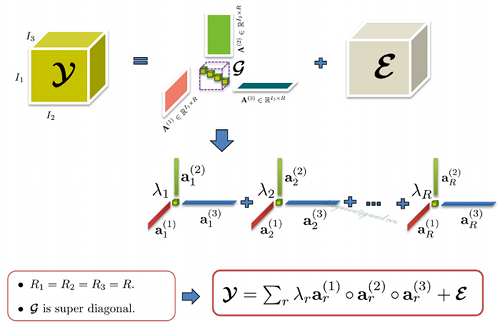

In [10]:
from IPython.display import Image
Image(filename='CP.png')

In [11]:
import pandas as pd
import pdb
from sktensor import dtensor, cp_als
from scipy.io.matlab import loadmat
import matplotlib.pyplot as plt
import itertools

mat = loadmat('alyawarradata.mat')
T = mat['Rs']
T = dtensor(T)
trainT = np.zeros_like(T)
p = 0.7
train_mask = np.random.binomial(1, p, T.shape)
trainT[train_mask==1] = T[train_mask==1]
test_mask = np.ones_like(T)
test_mask[train_mask==1] = 0
print('training size %d' % np.sum(trainT))
print('test size %d' % np.sum(T[test_mask==1]))

# Decompose tensor using CP-ALS
P, fit, itr, exectimes = cp_als(trainT, 3, init='random')
reconstructed_tensor = P.totensor()
from sklearn.metrics import roc_auc_score
print(roc_auc_score(T[test_mask==1], reconstructed_tensor[test_mask==1]))

training size 7522
test size 3268
0.881508337194


## CP Entity Embedding Visualization

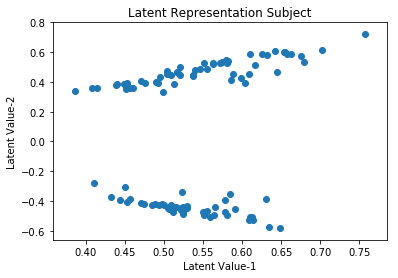

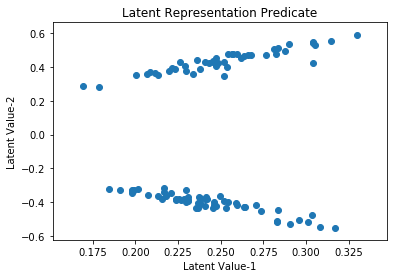

In [12]:
subject_emb = P.U[0]
plt.scatter(subject_emb[:,0],subject_emb[:,1])
plt.xlabel('Latent Value-1')
plt.ylabel('Latent Value-2')
plt.title('Latent Representation Subject')
plt.show()

object_emb = P.U[1]
plt.scatter(object_emb[:,0],object_emb[:,1])
plt.xlabel('Latent Value-1')
plt.ylabel('Latent Value-2')
plt.title('Latent Representation Predicate')
plt.show()

## Exercise-4.4
## Rescal Decomposition


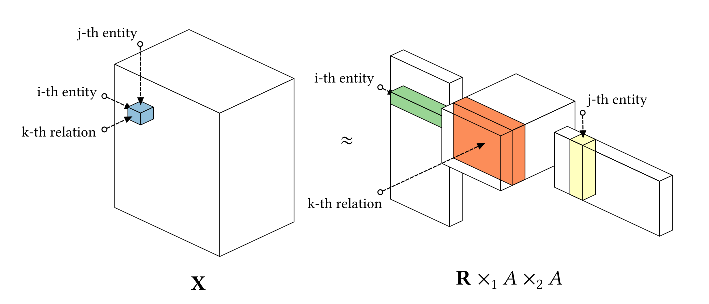

In [13]:
from IPython.display import Image
Image(filename='rescal.png')

In [16]:
from numpy.linalg import norm
from numpy.random import shuffle
from scipy.sparse import lil_matrix
from sklearn.metrics import precision_recall_curve, auc
from rescal import rescal_als

def normalize_predictions(P, nm_entities, nm_relations):
    for a in range(nm_entities):
        for b in range(nm_entities):
            nrm = norm(P[a, b, :nm_relations])
            if nrm != 0:
                # round values for faster computation of AUC-PR
                P[a, b, :nm_relations] = np.round_(P[a, b, :nm_relations] / nrm, decimals=3)
    return P

def rescal_fact(train_tensor, n_dim, nm_entities, nm_relations):

    entity_embedding, R, _, _, _ = rescal_als(train_tensor, n_dim, init='nvecs', conv=1e-3,lambda_A=10, lambda_R=10)
    n = entity_embedding.shape[0]
    reconstructed_tensor = np.zeros((n, n, len(R)))
    for k in range(len(R)):
        reconstructed_tensor[:, :, k] = np.dot(entity_embedding, np.dot(R[k], entity_embedding.T))
    reconstructed_tensor = normalize_predictions(reconstructed_tensor, nm_entities, nm_relations)

    return entity_embedding, reconstructed_tensor

def load_data(filename, train_fraction=0.7):
    mat = loadmat(filename)
    K = np.array(mat['Rs'], np.float32)
    nm_entities, nm_relations = K.shape[0], K.shape[2]
    # construct array for rescal
    T = [lil_matrix(K[:, :, i]) for i in range(nm_relations)]
    # Train Test Split
    triples = nm_entities * nm_entities * nm_relations
    IDX = list(range(triples))
    shuffle(IDX)
    train = int(train_fraction*len(IDX))
    idx_test = IDX[train:]

    train_tensor = [Ti.copy() for Ti in T]
    mask_idx = np.unravel_index(idx_test, (nm_entities, nm_entities, nm_relations))
    # set values to be predicted to zero
    for i in range(len(mask_idx[0])):
        train_tensor[mask_idx[2][i]][mask_idx[0][i], mask_idx[1][i]] = 0
    return K, train_tensor, mask_idx, nm_entities, nm_relations

n_dim = 100
filename='alyawarradata.mat'
K, train_tensor, target_idx, nm_entities, nm_relations = load_data(filename, train_fraction=0.7)
# Train Rescal
entity_embedding, reconstructed_tensor = rescal_fact(train_tensor, n_dim, nm_entities, nm_relations)
#prec, recall, _ = precision_recall_curve(K[target_idx], reconstructed_tensor[target_idx])
#entities = mat['names']
print('AUC\n{}'.format(roc_auc_score(K[target_idx], reconstructed_tensor[target_idx])))

AUC
0.9855603205907866


## Rescal Entity Embedding Visualization

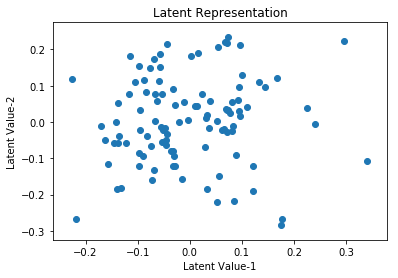

In [17]:
plt.scatter(entity_embedding[:,0],entity_embedding[:,1])
plt.xlabel('Latent Value-1')
plt.ylabel('Latent Value-2')
plt.title('Latent Representation')
plt.show()

## Exercise-4.5 
Parameter Tuning.

RESCAL is sensitive to parameters. In this section we will study the effect of parameters.


In [18]:
def load_train_val_test(filename, train_fraction=0.6, val_fraction=0.2):
    mat = loadmat(filename)
    K = np.array(mat['Rs'], np.float32)
    nm_entities, nm_relations = K.shape[0], K.shape[2]
    # construct array for rescal
    T = [lil_matrix(K[:, :, i]) for i in range(nm_relations)]
    # Train Test Split
    triples = nm_entities * nm_entities * nm_relations
    IDX = list(range(triples))
    shuffle(IDX)
    train = int(train_fraction*len(IDX))
    val = int(val_fraction*len(IDX))
    idx_val = IDX[train:train+val]
    idx_test = IDX[train+val:]
    train_tensor = [Ti.copy() for Ti in T]
    mask_idx = np.unravel_index(idx_test+idx_val, (nm_entities, nm_entities, nm_relations))
    val_idx = np.unravel_index(idx_val, (nm_entities, nm_entities, nm_relations))
    test_idx = np.unravel_index(idx_test, (nm_entities, nm_entities, nm_relations))
    # set values to be predicted to zero
    for i in range(len(mask_idx[0])):
        train_tensor[mask_idx[2][i]][mask_idx[0][i], mask_idx[1][i]] = 0
    return K, train_tensor, val_idx, test_idx

n_dim = 10
filename='alyawarradata.mat'
# Mask Test and Validation Triples
K, train_tensor, val_idx, test_idx = load_train_val_test(filename, train_fraction=0.6, val_fraction=0.2)
var_list = [0.001, 0.1, 1., 10., 100.]
best_roc = 0
# Train on training set and evaluate on validation set
for (var_x, var_e, var_r) in itertools.product(var_list, repeat=3):
    A, R, f, itr, exectimes = rescal_als(train_tensor, n_dim, lambda_A=var_x, lambda_R=var_e, lambda_V=var_r)
    n = A.shape[0]
    reconstructed_tensor = np.zeros((n, n, len(R)))
    for k in range(len(R)):
        reconstructed_tensor[:, :, k] = np.dot(A, np.dot(R[k], A.T))
    reconstructed_tensor = normalize_predictions(reconstructed_tensor, nm_entities, nm_relations)
    score = roc_auc_score(K[val_idx], reconstructed_tensor[val_idx])

    print('var_x:{0:3.3f}, var_e:{1:3.3f}, var_r:{2:3.3f}, AUC-ROC:{3:.3f}'.format(var_x, var_e, var_r, score))
    if score > best_roc:
        best_vars = (var_x, var_e, var_r)
        best_roc = score
        
lambda_a, lambda_r, lambda_v = best_vars
print(best_vars, best_roc)
# Use optimum parameters on Validation Set and Test on Hold-Out Set
lambda_a, lambda_r, lambda_v = best_vars
A, R, f, itr, exectimes = rescal_als(train_tensor, n_dim, lambda_A=var_x, lambda_R=var_e, lambda_V=var_r)
n = A.shape[0]
reconstructed_tensor = np.zeros((n, n, len(R)))
for k in range(len(R)):
    reconstructed_tensor[:, :, k] = np.dot(A, np.dot(R[k], A.T))
reconstructed_tensor = normalize_predictions(reconstructed_tensor, nm_entities, nm_relations)
score = roc_auc_score(K[test_idx], reconstructed_tensor[test_idx])
print('AUC On Test Set with Optimum Parameters\n{}'.format(score))

var_x:0.001, var_e:0.001, var_r:0.001, AUC-ROC:0.964
var_x:0.001, var_e:0.001, var_r:0.100, AUC-ROC:0.964
var_x:0.001, var_e:0.001, var_r:1.000, AUC-ROC:0.964
var_x:0.001, var_e:0.001, var_r:10.000, AUC-ROC:0.964
var_x:0.001, var_e:0.001, var_r:100.000, AUC-ROC:0.964
var_x:0.001, var_e:0.100, var_r:0.001, AUC-ROC:0.964
var_x:0.001, var_e:0.100, var_r:0.100, AUC-ROC:0.964
var_x:0.001, var_e:0.100, var_r:1.000, AUC-ROC:0.964
var_x:0.001, var_e:0.100, var_r:10.000, AUC-ROC:0.964
var_x:0.001, var_e:0.100, var_r:100.000, AUC-ROC:0.964
var_x:0.001, var_e:1.000, var_r:0.001, AUC-ROC:0.964
var_x:0.001, var_e:1.000, var_r:0.100, AUC-ROC:0.964
var_x:0.001, var_e:1.000, var_r:1.000, AUC-ROC:0.964
var_x:0.001, var_e:1.000, var_r:10.000, AUC-ROC:0.964
var_x:0.001, var_e:1.000, var_r:100.000, AUC-ROC:0.964
var_x:0.001, var_e:10.000, var_r:0.001, AUC-ROC:0.964
var_x:0.001, var_e:10.000, var_r:0.100, AUC-ROC:0.964
var_x:0.001, var_e:10.000, var_r:1.000, AUC-ROC:0.964
var_x:0.001, var_e:10.000, var_r:1